In [2]:
import os
import sys
import pickle

import pandas as pd
import numpy as np
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

from config import RESULTS, FIGURES
from code_.tools.plotting_tools import *
from code_.model_activations.configs import analysis_cfg

In [3]:
MULTIPLIER = 36

def load_and_prepare_data(model_name, multiplier, dataset, region):    
    filepath = os.path.join(RESULTS, f'bootstrap-results-{model_name}-{dataset}-{region}.csv')
    df = pd.read_csv(filepath)
    df['model'] = model_name
    df['features'] = df['features'].apply(lambda x: int(x) * multiplier)
    df['score'] = df['score'].apply(lambda x: float(x.replace("tensor(", "").replace(")", "")))
    return df

In [4]:
DATASET = 'naturalscenes' # one of ['majajhong', 'naturalscenes']
region = analysis_cfg[DATASET]['regions']

In [5]:
# loading linear model data
df_nl = load_and_prepare_data('non_linearities', MULTIPLIER, DATASET, region)

df_expansion_linear = load_and_prepare_data('expansion_linear', MULTIPLIER, DATASET, region)
df_expansion_linear['nl_type'] = 'None'
# note the double brackets around -1
df_expansion_linear = df_expansion_linear.iloc[[-1], :]  

df_expansion_relu = load_and_prepare_data('expansion', MULTIPLIER, DATASET, region)
df_expansion_relu = df_expansion_relu.iloc[[-1], :]

df = pd.concat([df_nl, df_expansion_linear, df_expansion_relu], ignore_index=True)


/tmp/ipykernel_615122/2177788406.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


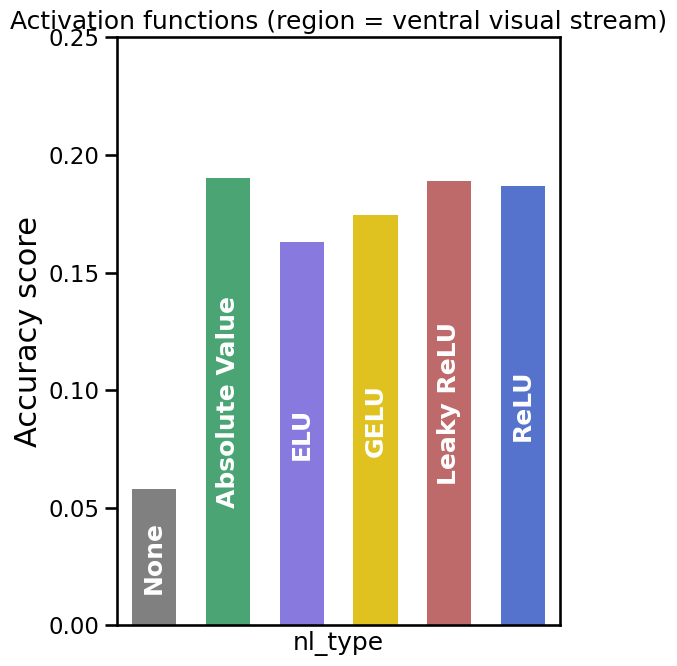

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

desired_order= ['None', 'abs', 'elu', 'gelu', 'leaky_relu', 'relu']
# your pretty‐name dict for the paper
name_map = {
    'relu':       'ReLU',
    'leaky_relu': 'Leaky ReLU',
    'gelu':       'GELU',
    'elu':        'ELU',
    'abs':        'Absolute Value',
    'None':       'None'          # or “No nonlinearity”
}

sns.set_context('talk')
plt.rcParams['figure.figsize'] = (6, 7)

palette = {
    'relu':       'royalblue',
    'leaky_relu': 'indianred',
    'gelu':       'gold',
    'elu':        'mediumslateblue',
    'abs':        'mediumseagreen',
    'None':       'gray'
}

ax1 = sns.barplot(
    x='nl_type',
    y='score',
    data=df,
    order=desired_order,
    palette=palette,
    width=0.6,
    dodge=False
)

# remove the old x-labels
ax1.set_xticks([])

# draw each bar’s pretty name vertically inside
for bar, nl in zip(ax1.patches, desired_order):
    height   = bar.get_height()
    x_center = bar.get_x() + bar.get_width()/2
    pretty   = name_map[nl]

    ax1.text(
        x_center,
        height/2,
        pretty,
        ha='center',
        va='center',
        rotation=90,
        fontweight='bold',
        color='white'
    )

plt.ylabel('Accuracy score', size=22)
plt.title(f'Activation functions (region = {region})')
plt.ylim((0, 0.65) if region == 'IT' else (0, 0.25))
plt.tight_layout()
plt.savefig(
    os.path.join(FIGURES, f'figure_S2_{DATASET}_{region}.png'),
    dpi=200
)
plt.show()
